In [1]:
# Regression Analysis in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# STEP 1: Load Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

Dataset Preview:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640

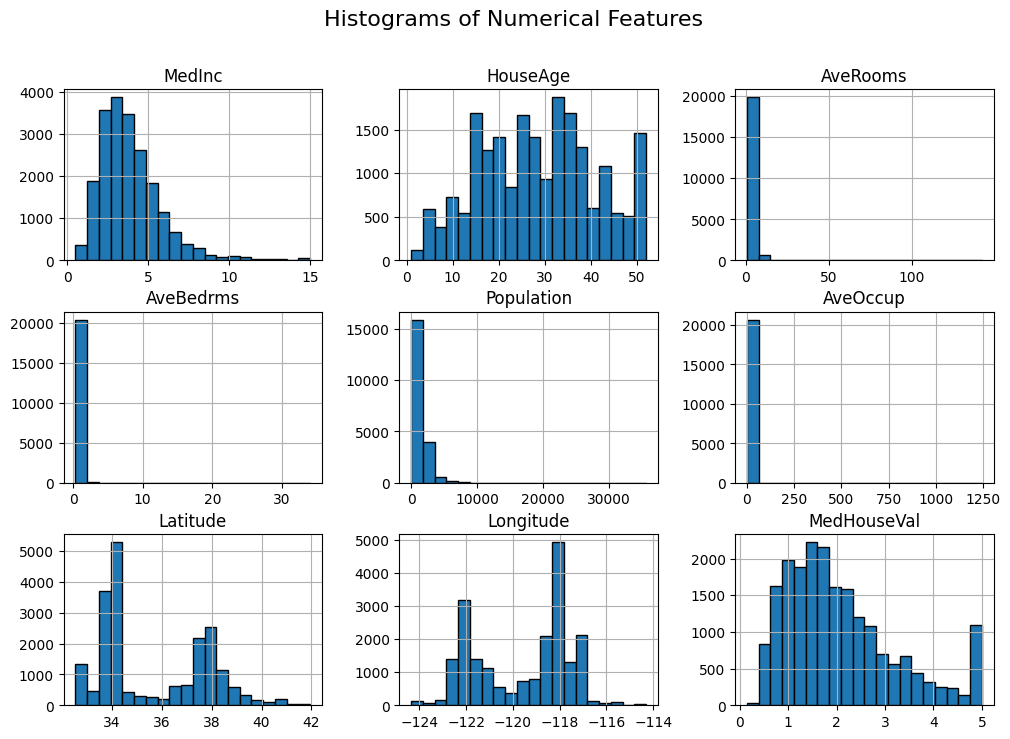

In [5]:
# STEP 2: Exploratory Data Analysis 
# Numerical Feature Distribution
df.hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

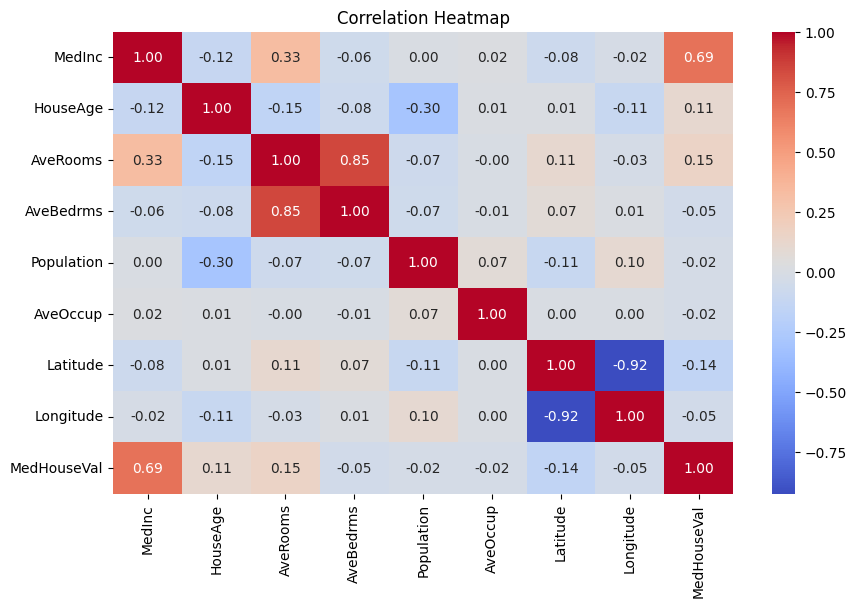

In [7]:
# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

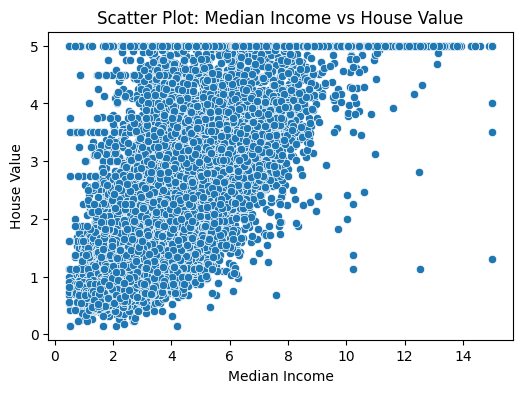

In [9]:
# Scatter plot: Feature vs Target (MedHouseVal)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"])
plt.title("Scatter Plot: Median Income vs House Value")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.show()

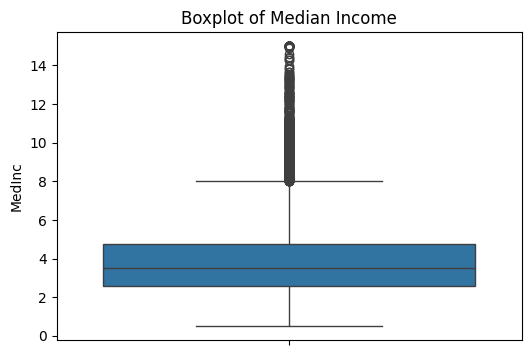

In [11]:
# Boxplot for detecting outliers in a feature
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["MedInc"])
plt.title("Boxplot of Median Income")
plt.show()

In [13]:
# STEP 3: Train-Test Split
X = df.drop("MedHouseVal", axis=1)   # Features
y = df["MedHouseVal"]                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# STEP 4: Apply Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [17]:
# STEP 5: Evaluation 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Model Performance:
Mean Squared Error (MSE): 0.555891598695244
R² Score: 0.5757877060324511


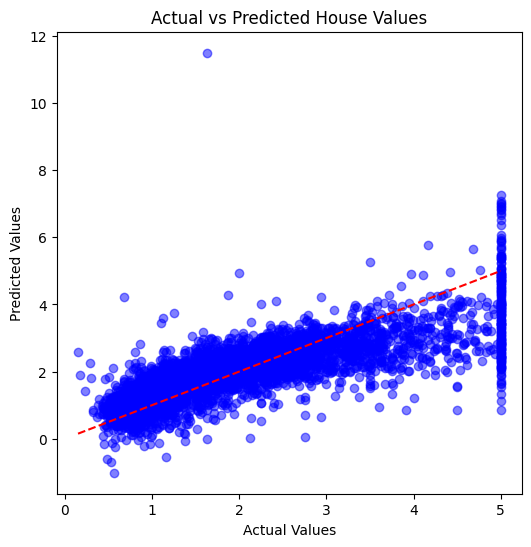

In [19]:
# STEP 6: Visualization of Predictions 
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Values")
plt.show()